# **Brownian Motion**

## **Random Walk**

In [9]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rc

Failed to find a Ghostscript installation.  Distillation step skipped.


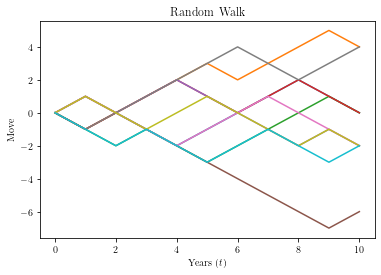

In [11]:
# Parameters
M = 10  # number of simulations
t = 10  # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M, t)).T
origin = np.zeros((1, M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.rc("text", usetex=True)
plt.plot(rw_paths)
plt.xlabel("$\mathrm{Years}\ (t)$", usetex=True)
plt.ylabel("$\mathrm{Move}$", usetex=True)
plt.title("$\mathrm{Random\enspace Walk}$", usetex=True)
plt.savefig('image/Random_Walk.eps')
plt.show()

In [12]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
[quadratic_variation(path) for path in rw_paths.T[:4]]

# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_paths[1:11]]

[0.96, 0.64, 0.96, 3.56, 4.96, 4.36, 5.0, 7.56, 9.76, 8.04]

Failed to find a Ghostscript installation.  Distillation step skipped.


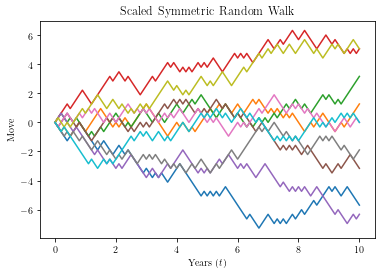

[10.0, 10.0, 10.0, 10.0]

In [16]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.rc("text", usetex=True)
plt.plot(tt,srw_paths)
plt.xlabel("$\mathrm{Years}\ (t)$", usetex=True)
plt.ylabel("$\mathrm{Move}$", usetex=True)
plt.title("$\mathrm{Scaled\enspace Symmetric\enspace Random\enspace Walk}$", usetex=True)
plt.savefig('image/Scaled_Symmetric_Random_Walk.eps')
plt.show()

# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]

[quadratic_variation(path) for path in srw_paths.T[:4]]

Failed to find a Ghostscript installation.  Distillation step skipped.


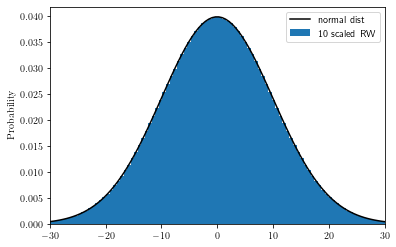

In [39]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 10
t = 100

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0],
    label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("$\mathrm{Probability}$", usetex=True)
plt.savefig('image/Normal_Distribution.eps')
plt.legend()
plt.show()

Failed to find a Ghostscript installation.  Distillation step skipped.


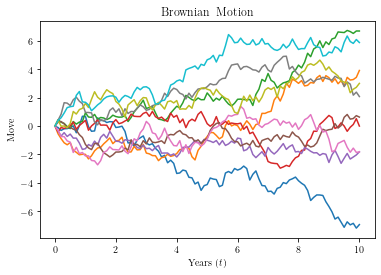

[0.144, 0.309, 0.582, 0.767, 0.7, 1.374, 1.627, 2.006, 1.832, 2.034]

In [14]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.rc("text", usetex=True)
plt.plot(tt,bm_paths)
plt.xlabel("$\mathrm{Years}\ (t)$", usetex=True)
plt.ylabel("$\mathrm{Move}$", usetex=True)
plt.title("$\mathrm{Brownian\enspace Motion}$", usetex=True)
plt.savefig('image/Brownian_Motion.eps')
plt.show()

# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]